In [3]:
#importacion de libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#carga de datasets
#Le especifico el tipo a algunas columnas porque sino me tira un warning, podria especificar el verdadero tipo tambien
todo = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv",\
                   dtype = {3: object,5: object,
                    6: object,7: object,
                    8: object,9: object,
                    10: object,11: object,
                    12: object,13: object,
                    14: object,15: object,
                    16: object,17: object,
                    18: object,19: object,
                    20: object,21: object,
                    22: object})
train = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/labels_training_set.csv")
usersJunio = pd.read_csv("/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv")

In [5]:
todo.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [5]:
usersJunio.head()

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


In [6]:
todo.dtypes

timestamp                    object
event                        object
person                       object
url                          object
sku                         float64
model                        object
condition                    object
storage                      object
color                        object
skus                         object
search_term                  object
staticpage                   object
campaign_source              object
search_engine                object
channel                      object
new_vs_returning             object
city                         object
region                       object
country                      object
device_type                  object
screen_resolution            object
operating_system_version     object
browser_version              object
dtype: object

In [9]:
#conversion de Object a datetime
todo['timestamp'] = pd.to_datetime(todo['timestamp'])

# Feature Engineering

In [10]:
#Comienzo buscando features sobre la cantidad de eventos por usuario

In [59]:
#Me quedo con los usuarios que convirtieron en junio(los de train)
usersTrain = todo[todo['person'].isin(train['person'])].sort_values(by = 'timestamp')

In [73]:
#Creo una columna con solo fecha sin tiempo
usersTrain['fecha'] = usersTrain['timestamp'].dt.date

In [84]:
# 1er feature: Cantidad de eventos por usuario
eventosPorUserTrain = usersTrain.groupby(['fecha','person'])['event'].size()
eventosPorUserTrain = pd.DataFrame(data = eventosPorUserTrain)\
                        .rename(columns = {'event' : 'cantEventos'})

In [86]:
eventosPorUserTrain.sort_values(by = 'fecha')

cantEventos
fecha      person               
2018-01-01 53a01f1e           16
           7c7e0de9            3
           8af11dbc          114
2018-01-02 e97ce636           11
           e6e5135d           16
           dbf6b08a           10
           d8001b23            3
           c000a5e5            7
           bc066ce7           29
           ade94444            5
           a50a535d            5
           d41bdb1a            3
           6c67de3e           13
           40f9b318           46
           37f1c724           14
           30ec9daf           10
           0d741016            4
           09252ee6           99
           08343c0e           10
           050f1a22           20
           7a2b9102           38
2018-01-03 ae35ba96           12
           b6b638d0           23
           bbe27ed9           18
           c91e61f6            6
           cdfe74eb           39
           e97ce636           18
           d6250272           16
           e6e5135d           16
           eb8b900e            3
...                          ...
2018-05-31 59c318bd          279
           59fb262b            7
           5a56e3da           85
           5a5cb85f            3
           5a6e92f6            6
           5a7820c9           58
           5871efff            1
           584f5175            5
           583473ab           20
           582ea59e           12
           5693236f           17
           56c5408b           50
           56dd817b           22
           56ff322d           12
           5705170c           29
           574ba252           29
           57767b68           38
           57837972            4
           5650a375            4
           57839df1           12
           57a26b97          223
           57aa856e           11
           57ae3cb3            3
           57bab525            5
           57ea2b7a           20
           57ed2cc9           19
           57ed5665           12
           580b21de            5
           5792deb4           52
           fff1659c           13

[68973 rows x 1 columns]

In [11]:
#Creo la columna con el feature en el set de train y lo agrego a un nuevo df
copiaTrain = train
mergeTrain = pd.merge(eventosPorUserTrain,copiaTrain, on = 'person', how= 'inner')
mergeTrain.head()

,person,cantEventos,label
0,0008ed71,6,0
1,000c79fe,17,0
2,001802e4,19,0
3,0019e639,471,0
4,001b0bf9,7,0


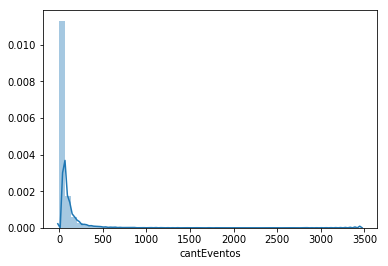

In [12]:
sns.distplot(mergeTrain['cantEventos']);

In [13]:
#Transformo a log para tener datos que parecen tener distribucion normal (?)
mergeTrain['cantEventos'] = np.log(mergeTrain['cantEventos'])

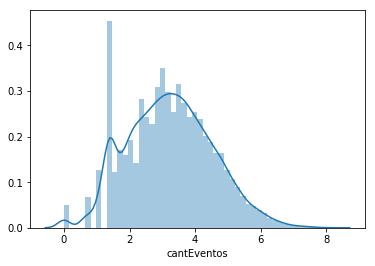

In [14]:
sns.distplot(mergeTrain['cantEventos']);

In [15]:
X,y = mergeTrain.iloc[:,:-1], mergeTrain.iloc[:,-1]

In [16]:
#Deberia aplicar algun algoritmo de encoding a la columna 'person'

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder